In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Neural Network Definition
class NeuralNetwork(nn.Module):
    def __init__(self, input_features, hidden_units=1024):
        super(NeuralNetwork, self).__init__()
        # self.ff = FourierFeatures(input_features, input_features*2, 4) # Double for sin and cos
        self.fc1 = nn.Linear(input_features, hidden_units)
        self.fc2 = nn.Linear(hidden_units, hidden_units)
        self.fc3 = nn.Linear(hidden_units, hidden_units)
        self.fc4 = nn.Linear(hidden_units, hidden_units)
        self.fc_out = nn.Linear(hidden_units, 1)  # Adjust output features as necessary
        self.relu = nn.ReLU()

    def forward(self, x):
        # x = self.ff(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        return self.fc_out(x)

In [3]:
# Training Setup
def train(model, criterion, optimizer, data, epochs=2000):
    model.train()
    for epoch in range(epochs):
        for inputs, targets in data:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

In [4]:
def target_function(x):
    return torch.sin(30*(x - 0.95)**4) * torch.cos(2*(x - 0.95)) + (x - 0.95)/2

In [5]:
import torch.nn.functional as F

class FourierFeatureLayer(nn.Module):
    def __init__(self, input_dim, num_freqs=4, spectral_bias=1):
        super(FourierFeatureLayer, self).__init__()
        self.input_dim = input_dim
        self.num_freqs = num_freqs
        self.spectral_bias = spectral_bias
        self.freqs = torch.arange(1, num_freqs + 1, dtype=torch.float32)
        self.scale = torch.pow(self.spectral_bias, -self.freqs)
        self.phase = torch.randn(num_freqs) * (2 * torch.pi)

    def forward(self, x):
        # Expand input to match batch size
        batch_size = x.shape[0]
        x = x.unsqueeze(1).repeat(1, self.num_freqs, 1)

        # Compute Fourier features
        features = torch.sin((x * self.freqs.unsqueeze(-1)) + self.phase.unsqueeze(-1))
        features = features * self.scale.unsqueeze(-1)

        return features.view(batch_size, -1)


In [6]:
# Example usage
inputs = torch.rand(100,1)
input_dim = 1
fourier_layer = FourierFeatureLayer(input_dim=input_dim, num_freqs=4, spectral_bias=1)

# Generate random input tensor
input_tensor = inputs

# Apply Fourier feature layer
output_tensor = fourier_layer(input_tensor)
print(output_tensor.shape)  # Output shape will be (batch_size, num_freqs * input_dim)

torch.Size([100, 4])


In [7]:
targets = target_function(inputs)

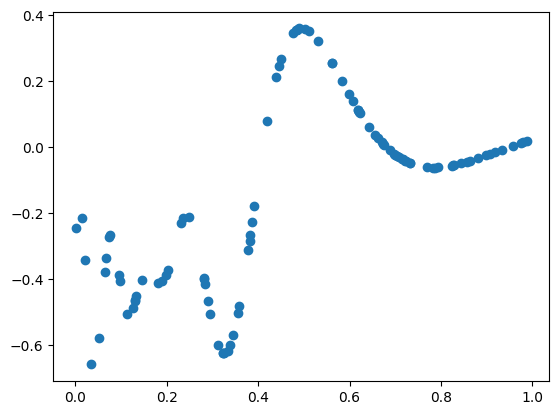

In [8]:
plt.scatter(x=inputs, y=targets)

In [9]:
output_tensor.shape

torch.Size([100, 4])

In [10]:
targets.shape

torch.Size([100, 1])

In [11]:
# Model and Training Initialization
model = NeuralNetwork(input_features=1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Start training
train(model, criterion, optimizer, [(inputs, targets)])

print("Training completed")

Epoch 1, Loss: 0.08822599053382874
Epoch 101, Loss: 0.07663296908140182
Epoch 201, Loss: 0.07250234484672546
Epoch 301, Loss: 0.06967251002788544
Epoch 401, Loss: 0.06733623147010803
Epoch 501, Loss: 0.06527215242385864
Epoch 601, Loss: 0.06332539767026901
Epoch 701, Loss: 0.06160173565149307
Epoch 801, Loss: 0.060036417096853256
Epoch 901, Loss: 0.05857326090335846
Epoch 1001, Loss: 0.05719392001628876
Epoch 1101, Loss: 0.05588444322347641
Epoch 1201, Loss: 0.05465223267674446
Epoch 1301, Loss: 0.05346908047795296
Epoch 1401, Loss: 0.05232878029346466
Epoch 1501, Loss: 0.0512574166059494
Epoch 1601, Loss: 0.05027083307504654
Epoch 1701, Loss: 0.049358658492565155
Epoch 1801, Loss: 0.048514824360609055
Epoch 1901, Loss: 0.04773551970720291
Training completed


In [12]:
model.eval()  # Set the model to evaluation mode
x_test = torch.linspace(0, 1, 50).unsqueeze(1)  # Test input data
y_test = target_function(x_test)

In [20]:
# Model and Training Initialization
model2 = NeuralNetwork(input_features=4)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=1e-3)

# Start training
train(model2, criterion, optimizer2, [(output_tensor, targets)])

print("Training completed")

Epoch 1, Loss: 0.09282983839511871
Epoch 101, Loss: 0.0731036439538002
Epoch 201, Loss: 0.0638594850897789
Epoch 301, Loss: 0.05843134969472885
Epoch 401, Loss: 0.05456545948982239
Epoch 501, Loss: 0.051504675298929214
Epoch 601, Loss: 0.04892057925462723
Epoch 701, Loss: 0.046689730137586594
Epoch 801, Loss: 0.04474683105945587
Epoch 901, Loss: 0.04304807633161545
Epoch 1001, Loss: 0.04154296964406967
Epoch 1101, Loss: 0.040195997804403305
Epoch 1201, Loss: 0.038973819464445114
Epoch 1301, Loss: 0.03786301985383034
Epoch 1401, Loss: 0.03684405982494354
Epoch 1501, Loss: 0.03590694069862366
Epoch 1601, Loss: 0.03503828123211861
Epoch 1701, Loss: 0.03422508016228676
Epoch 1801, Loss: 0.03345514461398125
Epoch 1901, Loss: 0.03273320198059082
Training completed


In [21]:
model2.eval()  # Set the model to evaluation mode

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=1024, bias=True)
  (fc_out): Linear(in_features=1024, out_features=1, bias=True)
  (relu): ReLU()
)

In [13]:
def calculate_mse(targets, predictions):
    return ((targets - predictions) ** 2).mean()

In [14]:
# Disable gradient tracking since we're only doing inference
with torch.no_grad():
    # Pass the test input data through the model to get predictions
    predictions = model(x_test)

calculate_mse(y_test, predictions)

tensor(0.0437)

In [24]:
# Apply Fourier feature layer
x_test2 = fourier_layer(x_test)
print(x_test2.shape)  # Output shape will be (batch_size, num_freqs * input_dim)

torch.Size([50, 4])


In [25]:
# Disable gradient tracking since we're only doing inference
with torch.no_grad():
    # Pass the test input data through the model to get predictions
    predictions2 = model2(x_test2)

calculate_mse(y_test, predictions2)

tensor(0.0304)

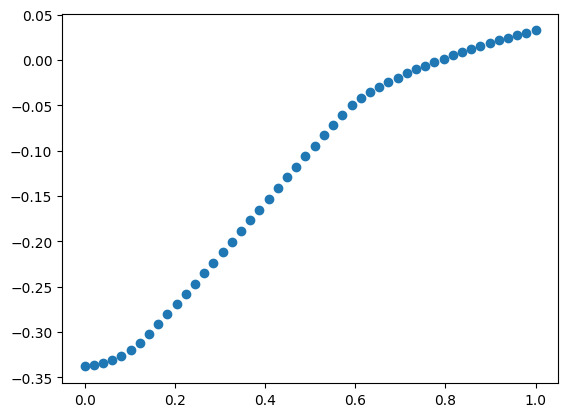

In [15]:
plt.scatter(x=x_test, y=predictions)

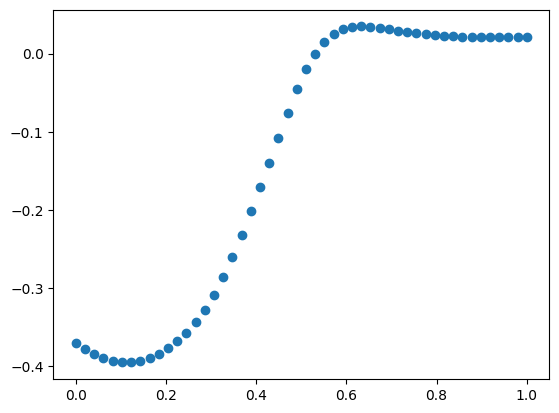

In [29]:
plt.scatter(x=x_test, y=predictions2)

In [17]:
import gpjax as gpx
import jax.numpy as jnp
import jax.random as jr
import matplotlib as mpl
from jax import jit

c:\Users\chinm\anaconda3\envs\torch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\chinm\anaconda3\envs\torch\Lib\site-packages\cola\backends\backends.py:75: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(cls, tree_flatten, tree_unflatten)


In [61]:
x_test2_jax = jnp.array(x_test2)
predictions2_jax = jnp.array(predictions2)
y_test_jax = jnp.array(y_test)

In [62]:
kernel = gpx.kernels.RBF()
meanf = gpx.mean_functions.Zero()
prior = gpx.gps.Prior(mean_function=meanf, kernel=kernel)

c:\Users\chinm\anaconda3\envs\torch\Lib\site-packages\gpjax\dataset.py:44: UserWarning: X is not of type float64. Got X.dtype=float32. This may lead to numerical instability. 
  _check_precision(self.X, self.y)
c:\Users\chinm\anaconda3\envs\torch\Lib\site-packages\gpjax\dataset.py:44: UserWarning: y is not of type float64.Got y.dtype=float32. This may lead to numerical instability.
  _check_precision(self.X, self.y)


In [63]:
key = jr.key(123)
key, subkey = jr.split(key)
cols = mpl.rcParams["axes.prop_cycle"].by_key()["color"]

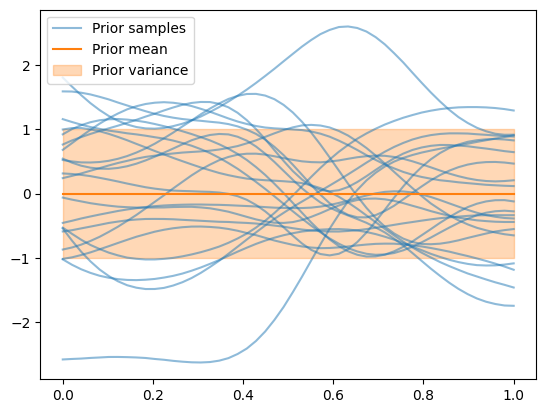

In [65]:
prior_dist = prior.predict(x_test2_jax)

prior_mean = prior_dist.mean()
prior_std = prior_dist.variance()
samples = prior_dist.sample(seed=key, sample_shape=(20,))


def clean_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    return ax


fig, ax = plt.subplots()
ax.plot(x_test, samples.T, alpha=0.5, color=cols[0], label="Prior samples")
ax.plot(x_test, prior_mean, color=cols[1], label="Prior mean")
ax.fill_between(
    x_test.flatten(),
    prior_mean - prior_std,
    prior_mean + prior_std,
    alpha=0.3,
    color=cols[1],
    label="Prior variance",
)
ax.legend(loc="best")
ax = clean_legend(ax)

In [27]:
def compute_loo_predictive_prob(gp, X_train, y_train):
    loo_probs = []
    for i in range(len(X_train)):
        # Leave out the ith training example
        X_loo = np.delete(X_train, i, axis=0)
        y_loo = np.delete(y_train, i, axis=0)

        # Train the GP model on the remaining examples
        gp.fit(X_loo, y_loo)

        # Compute mean and variance predictions for the left-out example
        left_out_example = np.expand_dims(X_train[i], axis=0)
        mu_i, sigma_i = gp.predict(left_out_example, return_std=True)

        yi = y_train[i]
        loo_prob = -np.log(sigma_i) - ((yi - mu_i) ** 2) / (2 * sigma_i ** 2) - 0.5 * np.log(2 * np.pi)
        loo_probs.append(loo_prob)

    return np.array(loo_probs)

# def compute_loo_predictive_prob(gp, X_train, y_train):
#     """
#     Compute the LOO predictive probability for each training example.

#     Args:
#     - gp: Trained Gaussian Process model
#     - X_train: Input features of the training data
#     - y_train: Target values of the training data

#     Returns:
#     - loo_probs: Array of LOO predictive probabilities for each training example
#     """
#     loo_probs = []
#     for i in range(len(X_train)):
#         # Leave out the ith training example
#         X_loo = np.delete(X_train, i, axis=0)
#         y_loo = np.delete(y_train, i, axis=0)

#         # Compute mean and variance predictions for the left-out example
#         mean_pred, var_pred = gp.predict(X_loo, return_std=True)

#         # Compute LOO predictive probability
#         sigma_i = np.sqrt(var_pred[i])  # Standard deviation of left-out example
#         mu_i = mean_pred[i]  # Mean prediction of left-out example
#         yi = y_train[i]  # True target value of left-out example
#         loo_prob = -np.log(sigma_i) - ((yi - mu_i) ** 2) / (2 * sigma_i ** 2) - 0.5 * np.log(2 * np.pi)
        
#         loo_probs.append(loo_prob)

#     return np.array(loo_probs)

# # Example usage:
# # Assuming you have a trained Gaussian Process model 'gp' and training data 'X_train', 'y_train'
# # loo_probs = compute_loo_predictive_prob(gp, X_train, y_train)


In [66]:
D = gpx.Dataset(X=x_test2_jax, y=y_test_jax)
likelihood = gpx.likelihoods.Gaussian(num_datapoints=D.n)
posterior = prior * likelihood

In [67]:
negative_mll = gpx.objectives.ConjugateMLL(negative=True)
negative_mll(posterior, train_data=D)

Array(51.28828, dtype=float32)

In [68]:
negative_mll = jit(negative_mll)

In [69]:
opt_posterior, history = gpx.fit_scipy(
    model=posterior,
    objective=negative_mll,
    train_data=D,
)

         Current function value: -41.482586
         Iterations: 11
         Function evaluations: 229
         Gradient evaluations: 213


c:\Users\chinm\anaconda3\envs\torch\Lib\site-packages\scipy\optimize\_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [70]:
latent_dist = opt_posterior.predict(x_test2_jax, train_data=D)
predictive_dist = opt_posterior.likelihood(latent_dist)

predictive_mean = predictive_dist.mean()
predictive_std = predictive_dist.stddev()

In [71]:
predictive_std

Array([0.08170062, 0.0741381 , 0.07259265, 0.07230821, 0.07193729,
       0.07156357, 0.07135144, 0.07128333, 0.07128949, 0.07134371,
       0.0714599 , 0.07165138, 0.07190792, 0.0722087 , 0.07254018,
       0.0728972 , 0.07327088, 0.07364728, 0.07401591, 0.07436974,
       0.07470106, 0.07500355, 0.07527277, 0.07550492, 0.07569734,
       0.07584807, 0.07595517, 0.07601792, 0.07603522, 0.07600645,
       0.07593138, 0.07580961, 0.07564165, 0.07542781, 0.07516792,
       0.07486724, 0.07452361, 0.07413957, 0.07373776, 0.07330859,
       0.07283866, 0.07239322, 0.07202466, 0.07166059, 0.07122028,
       0.07079554, 0.07067156, 0.07125306, 0.07307177, 0.07689094],      dtype=float32)

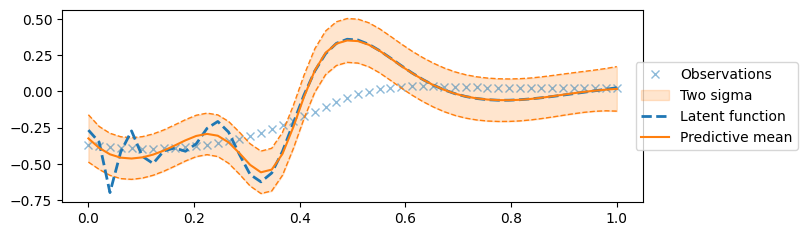

In [72]:
fig, ax = plt.subplots(figsize=(7.5, 2.5))
ax.plot(x_test, predictions2, "x", label="Observations", color=cols[0], alpha=0.5)
ax.fill_between(
    x_test.squeeze(),
    predictive_mean - 2 * predictive_std,
    predictive_mean + 2 * predictive_std,
    alpha=0.2,
    label="Two sigma",
    color=cols[1],
)
ax.plot(
    x_test,
    predictive_mean - 2 * predictive_std,
    linestyle="--",
    linewidth=1,
    color=cols[1],
)
ax.plot(
    x_test,
    predictive_mean + 2 * predictive_std,
    linestyle="--",
    linewidth=1,
    color=cols[1],
)
ax.plot(
    x_test, y_test, label="Latent function", color=cols[0], linestyle="--", linewidth=2
)
ax.plot(x_test, predictive_mean, label="Predictive mean", color=cols[1])
ax.legend(loc="center left", bbox_to_anchor=(0.975, 0.5))